# **Table of Contents**

---
**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Acquire**](#Section41)
  - **4.2** [**Glimpse Of Data**](#Section42)
  - **4.3** [**Data Information**](#Section43)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Merging the Data**](#Section51)  
  - **5.2** [**Identification & Handling of Missing Data**](#Section52)
  - **5.3** [**Identification & Handling of Inconsistent Data Types**](#Section53)
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>
  - **6.1** [**Univariate Analysis**](#Section61)
  - **6.2** [**Bivariate Analysis**](#Section62)

<a id = Section1></a>

---
# **1. Introduction**
---

**Employee churn** can be defined as a leak or **departure** of an **intellectual asset** from a **company** or **organization**. Alternatively, in simple words, you can say, when **employees leave the organization** is known as **churn**. Another definition can be when a member of a **population leaves** a **population**, is known as **churn**.

<center><img src = "https://github.com/Karkerayashish/Employee_Churn_Analysis-/blob/master/employee-retention-metrics-blog-banner.jpg?raw=true"></center>

Among all the multiple aspects of **Human Resource** functions, **Attrition** is **painful& dreadful** thing which an **organization** has to face inevitably. Along with employee, **valuable knowledge** built over the period also walks out of the door. Also Whenever does an employee decide to put down his/her **resignation** business takes a hit either in terms of **productivity** of that employee till he finally walks out of the system or **Morale of fellow colleagues**.

<a id = Section2></a>

---
# **2. Problem Statement**
---

**Employee turn-over** (also known as “**employee churn**”) is a costly problem for **companies**. The true cost of **replacing** an employee can often be quite large. Understanding why and when employees are most likely to leave can lead to actions to **improve employee retention** as well as possibly **planning new hiring in advance**.

<center><img src="https://github.com/Karkerayashish/Employee_Churn_Analysis-/blob/master/Untitled.png?raw=true"></center>



**HR Department** at a **software company** wants to know how they can work on keeping the **attrition** under the **limit ?** Is it possible that they can **predict**  which **employee** is more likely to **resign ?**. So that **HR** can be more **proactive** in reaching out to them before it's too late.


The **HR department** wants **data science consultants** to tackle this problem. They **need** an **automated solution** to **identify** whether an **employee** is going to **stay** or **leave**, so that they can **supplement** their **exit interviews** with a more **proactive** approach.

<a id = Section3></a>

---
# **3. Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from glob import glob
import mysql.connector

warnings.filterwarnings("ignore")

<a id = Section4></a>

---
# **4. Data Acquisition & Wrangling**
---

The Business Intelligence Analysts of the Company provided three datasets that contain information about past employees and their status (still employed or already left).

**1. department_data**

This dataset contains information about each department. The schema of the dataset is as follows:

|  ID |  Features |  Description |
| ------------ | ------------ | ------------ |
|  1 | dept_id   |  Unique Department Code |
|  2 |  dept_name  | Name of the Department  |
|  3 |  dept_head  | Name of the Head of the Department

**2. employee_details_data**

This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

|  ID |  Features |  Description |
| ------------ | ------------ | ------------ |
|  1 | employee_id    |  Unique ID Number for each employee |
|  2 |  age   | Age of the employee  |
|  3 |  gender   | Gender of the employee
|  4 |  marital_status    | Marital Status of the employee

**3. employee_data**

This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

##### Target variable

|  ID |  Features |  Description |
| ------------ | ------------ | ------------ |
|  1 | status     |  Current employment status (Employed / Left) |

##### Administrative information

|  ID |  Features |  Description |
| ------------ | ------------ | ------------ |
|  1 | department      |  Department to which the employees belong(ed) to |
|  2 | salary      |  Salary level with respect to rest of their department |
|  3 | tenure      |  Number of years at the company |
|  4 | recently_promoted      |  Was the employee promoted in the last 3 years? |
|  5 | employee_id      |  Unique ID Number for each employee |

##### Workload information

|  ID |  Features |  Description |
| ------------ | ------------ | ------------ |
|  1 | n_projects      |  Number of projects employee has worked on |
|  2 | avg_monthly_hrs       |  Average number of hours worked per month |

##### Mutual evaluation information

|  ID |  Features |  Description |
| ------------ | ------------ | ------------ |
|  1 | satisfaction       |  Score for employee’s satisfaction with the company (higher is better) |
|  2 | last_evaluation        |  Score for most recent evaluation of employee (higher is better) |
|  2 | filed_complaint        |  Has the employee filed a formal complaint in the last 3 years? |

<a id = Section41></a>
### **4.1 Data Acquire**

- In this section we will  **Acquire the data** by connecting to mysql database.

To access the **MySQL database** from **Python**, you need a database **driver**. 
**MySQL Connector/Python** is a standardized database **driver** provided by **MySQL**.

In [256]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  passwd="student",
  database="Capstone2"
)

print(mydb)

***If you see the above output, it means that you have been successfully installed the MySQL Connector/Python on your system.***

**Since we have 3 tables to import from mysql, we will follow below approach.**
- Create a **list** of tables needs to read into python.
- **Loop** through the table names and read the tables from mysql.

In [257]:
mytablelist=['department_data','employee_details_data','employee_data']

mycursor = mydb.cursor()

for i in mytablelist:
    mycursor.execute("SELECT * FROM "+i)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult)
    df.to_csv(r"E:\workaround\Python\INSAID\Capstone_Project_2\\"+i+".csv")

***Loop through the csv files saved and create a list of data frames.***

In [2]:
from glob import glob
list_data=[]
filenames = glob("E:\workaround\Python\INSAID\Capstone_Project_2\\*.csv")
list_data = [pd.read_csv(f) for f in filenames]

In [ ]:
# Assign name to all the dataframe lists created

In [3]:
department_data = list_data[0]
employee_details_data = list_data[2]
employee_data = list_data[1]

<a id = Section42></a>
### **4.2 Glimpse Of Data**

In [4]:
department_data.head(2)

,Unnamed: 0,0,1,2
0,0,D00-IT,IT,Henry Adey
1,1,D00-SS,Sales,Edward J Bayley


In [85]:
employee_details_data.head(2)

,Unnamed: 0,0,1,2,3
0,0,113558,43,Male,Married
1,1,112256,24,Female,Unmarried


In [86]:
employee_data.head(2)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210


*As we can see that we do have column headers populating in our datasets. Lets check in mysql table to see if there are column names  populating.*

In [34]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM department_data LIMIT 0")
mycursor.column_names 

('dept_id', 'dept_name', 'dept_head')

In [37]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM employee_details_data LIMIT 0")
mycursor.column_names 

('employee_id', 'age', 'gender', 'marital_status')

In [40]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM employee_data LIMIT 0")
mycursor.column_names 

('avg_monthly_hrs',
 'department',
 'filed_complaint',
 'last_evaluation',
 'n_projects',
 'recently_promoted',
 'salary',
 'satisfaction',
 'status',
 'tenure',
 'employee_id')

*We have the column names populating for all three datasets in mysql table. We will manually add these respective column names to the datasets.*

In [5]:
department_data.drop(['Unnamed: 0'], axis = 1,inplace=True) 
department_data.columns=['dept_id', 'dept_name', 'dept_head']

In [6]:
department_data.head(5)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [7]:
print("Total number of rows in department_data dataset = {}".format(department_data.shape[0]))
print("Total number of columns in department_data dataset = {}".format(department_data.shape[1]))

Total number of rows in department_data dataset = 11
Total number of columns in department_data dataset = 3


In [7]:
employee_details_data.drop(['Unnamed: 0'], axis = 1,inplace=True) 
employee_details_data.columns=['employee_id', 'age', 'gender', 'marital_status']

In [8]:
employee_details_data.head(5)

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [49]:
print("Total number of rows in employee_data dataset = {}".format(employee_data.shape[0]))
print("Total number of columns in employee_data dataset = {}".format(employee_data.shape[1]))

Total number of rows in employee_data dataset = 14245
Total number of columns in employee_data dataset = 4


In [9]:
employee_data.drop(['Unnamed: 0'], axis = 1,inplace=True) 
employee_data.columns=['avg_monthly_hrs',
 'department',
 'filed_complaint',
 'last_evaluation',
 'n_projects',
 'recently_promoted',
 'salary',
 'satisfaction',
 'status',
 'tenure',
 'employee_id']

In [10]:
employee_data.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,NaN,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,NaN,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [60]:
print("Total number of rows in employee_details_data dataset = {}".format(employee_details_data.shape[0]))
print("Total number of columns in employee_details_data dataset = {}".format(employee_details_data.shape[1]))

Total number of rows in employee_details_data dataset = 14150
Total number of columns in employee_details_data dataset = 11


<a id = Section43></a>
### **4.3 Data Information**

- In this section we will see the **information about the types of features**.

In [267]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


**Observations:**
- We do not have any null values and all the data types are correct.

In [268]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


**Observations:**
- We do not have any null values and all the data types are correct.

In [269]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


**Observations:**

 - **Features:**
  - Problem &rarr; Action Required
 - **Department:**
  - Missing Information (707 Records) &rarr; impute with forward fill
 - **filed_complaint:**
  - Missing Information (12104 Records); Replace with Zeros
 - **last_evaluation:**
  - Missing Information (1487 Records); impute with mean value
 - **recently_promoted:**
  - Missing Information (13853 Records); Replace with Zeros
 - **satisfaction:**
  - Missing Information (150 Records); impute with mean value
 - **tenure:**
  - Missing Information (150 Records); impute with mode value  

<a id = Section5></a>

---
# **5. Data Pre-Processing**
---

<a id = Section51></a>
### **5.1 Merging the Data**

**1. First we will be merging employee_data and employee_details_data**
- We will performing **inner join** using **Employee Id**, so it is important to follow below steps before performing join:-
 - **Empployee ID** column does not contain **duplicate ID's**.
 - **Employee ID** cant be **blank**.
 - **Employee ID** cannot contain **inconsistent data**.

- We will ensure to check all the steps before performing join.


**In the below step, we are checking to see if Employee ID contains any value with zero.**

In [11]:
employee_data[employee_data['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.0,D00-SS,NaN,0.852702,6,NaN,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,NaN,0.774554,6,NaN,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,NaN,0.402660,2,NaN,medium,0.437359,Left,3.0,0
11304,167.0,NaN,NaN,0.880053,5,NaN,low,0.682140,Employed,3.0,0
12304,259.0,D00-ENG,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0,0


- As you can see there are **5 records** which contains **Employee ID** as **Zero**.
- We will try to **impute Employee ID** by following below steps:-
 - First we check the **Unique Employee ID's** in both the **datasets[employee_details_data, employee_data]**.
 - **Impute** the **Employee ID's which has zero values** with the **Unqiue Employee ID's from the employee_details_data**.

In [12]:
id = []
count = 0
l = employee_details_data['employee_id'].unique()
for index, value in enumerate(l):
    if value not in employee_data['employee_id'].unique():
        count = count + 1
        if count < 6:
            print(value)
            id.append(value)
    else:
        count = count
print("Total unqiue employee id: {}".format(count))

102113
123320
134126
115699
116853
Total unqiue employee id: 129


In [13]:
emp_index  = employee_data[employee_data['employee_id']==0].index.values.tolist()
emp_index

[34, 304, 1234, 11304, 12304]

In [14]:
k=0
for i in emp_index:
    employee_data['employee_id'].iloc[i]  = id[k]
    k= k + 1

In [15]:
employee_data[employee_data['employee_id']==0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


- We have now **imputed the EmployeeID which had zero values** with the **Unique EmployeeID's from the employee_details_data**.

- Let's check if there are any **Duplicate EmployeeID's** in the employee_data

In [16]:
duplicateRowsDF = employee_data[employee_data.duplicated(['employee_id'])]
duplicateRowsDF.shape[0]

29

 - As we can see, we have **29 Duplicate Employee id's** which we need to **remove before performing the joins**.

In [17]:
employee_data.sort_values("employee_id", inplace = True)
duplicateRowsDF = employee_data["employee_id"].duplicated(keep ='first') 
employee_data = employee_data[~duplicateRowsDF] 
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 9436 to 10600
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    2041 non-null   float64
 3   last_evaluation    12634 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14121 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             13971 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [18]:
duplicateRowsDF = employee_data[employee_data.duplicated(['employee_id'])]
duplicateRowsDF.shape[0]

0

In [19]:
employee_data.shape

(14121, 11)

 - We have **removed the duplicate employee id's**.

- Now we will perform **inner join** on **employee_data** & **employee_details_data**.
- We will save all the joined data into a new dataframe called **emp_data**.

In [20]:
emp_data = pd.merge(employee_data,employee_details_data,on='employee_id',how='inner')

In [21]:
emp_data.shape

(14121, 14)

**2. We will be merging emp_data and with department_data**
- We will performing **Left join** using **Department variable**, so it is important to follow below steps before performing join:-
    
 - **Department** cant be **blank**.
 - **Department** cannot contain **inconsistent data**.

- We will ensure to check all the steps before performing join.

- Let's check if the **department id's are consistent** in both the datasets.

In [148]:
department_data['dept_id'].value_counts()

D00-ENG    1
D00-FN     1
D00-MT     1
D00-SS     1
D00-PR     1
D00-IT     1
D00-AD     1
D00-MN     1
D00-TP     1
D00-PD     1
D00-SP     1
Name: dept_id, dtype: int64

In [153]:
emp_data['department'].value_counts()

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

**Observation:**

- As we can see, we have **11 departments** in the **department_data**.    
- In **emp_data**, we have **12** departments** populating.
- We have 2 departments named **D00-IT** & **-IT** which seems to be same.

**Action:**

- We will change the name department name of **-IT** to **D00-IT** before merging.

In [22]:
emp_data.loc[emp_data.department == '-IT', "department"]="D00-IT"

In [23]:
emp_data['department'].value_counts()

D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

**Observation:**
- Now we have **11 departments in emp_data**.

- Let's check if there are any **Null values** present in **department id** column.

In [24]:
emp_data['department'].isna().sum()

707

- We will **impute** the **department id** column with **forward filling**.
 - We could have **imputed with Mode**, which could have been all **707 missing records getting assigned** to the most occuring department which in this case is **D00-SS**.
 - In order to keep **uniformity across all department**, we have used **forward filling**

- Refrence Link

[GeeksforGeeks link on forward filling][id/name] 

[id/name]: https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/

In [25]:
emp_data['department'].fillna(method='ffill',inplace=True)

In [27]:
emp_data['department'].value_counts()

D00-SS     4083
D00-ENG    2716
D00-SP     2236
D00-IT     1430
D00-PD      894
D00-MT      857
D00-FN      752
D00-MN      623
D00-PR      186
D00-AD      183
D00-TP      161
Name: department, dtype: int64

In [28]:
emp_data['department'].isna().sum()

0

- We have **imputed all the null department id's**.
- Now we can perform **joins between emp_data and department_data**.

- Before performing join, we need to have the same column name for the **primary key**.

In [29]:
department_data = department_data.rename(columns={"dept_id": "department"})

In [30]:
empdata = pd.merge(emp_data,department_data,on='department',how='left')

In [31]:
empdata.shape

(14121, 16)

**Observation:**
- We have our **final dataset** called **empdata**.

<a id = Section52></a>
### **5.1 Identification & Handling of Missing Data**

**Before Handling Null Data**

In [32]:
null_frame = pd.DataFrame(index = empdata.columns.values)
null_frame['Null Frequency'] = empdata.isnull().sum().values
percent = empdata.isnull().sum().values/empdata.shape[0]
null_frame['Missing %age'] = np.round(percent,decimals=4)*100
null_frame.transpose()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
Null Frequency,0.0,0.0,12080.00,1487.00,0.0,13824.0,0.0,150.00,0.0,150.00,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,85.55,10.53,0.0,97.9,0.0,1.06,0.0,1.06,0.0,0.0,0.0,0.0,0.0,0.0


- **filed_complaint** column talks about if **employee has filed a formal complaint** in the **last 3 years?**.
- Let's start with **imputing** the **filed_complaint** column.

In [33]:
empdata.filed_complaint.value_counts()

1.0    2041
Name: filed_complaint, dtype: int64

**Observation:**
- We have **1** and **NAN** populating in the data.
- **1 indicates** that the **employee has given complaint**.
- So the remaining data which means **employees have not given complaint**.
- We will **replace** the **NAN** values with **zero**.

In [34]:
empdata['filed_complaint'] = empdata['filed_complaint'].fillna(0)

In [35]:
empdata.filed_complaint.value_counts()

0.0    12080
1.0     2041
Name: filed_complaint, dtype: int64

 - We have replced the **filed_complaint** column **missing** data with **zero**.

- **recently_promoted** column talks if the **employee was promoted in the last 3 years?**.
- Let's start with **imputing** the **recently_promoted** column.

In [36]:
empdata.recently_promoted.value_counts()

1.0    297
Name: recently_promoted, dtype: int64

**Observation:**
- We have **1** and **NAN** populating in the data.
- 1 indicates that the employee was **promoted**.
- So the remaining data which indicates **employees are not promoted**.
- We will **replace** the **NAN** values with **zero**.

In [37]:
empdata['recently_promoted'] = empdata['recently_promoted'].fillna(0)

In [38]:
empdata.recently_promoted.value_counts()

0.0    13824
1.0      297
Name: recently_promoted, dtype: int64

 - We have replced the **recently_promoted** column **missing** data with **zero**.

 - The **satisfaction** column which talks about the **Score** for **employee’s satisfaction** with the **company (higher is better)**

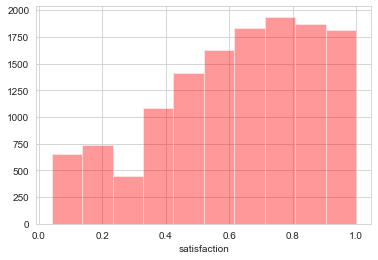

In [306]:
sns.set_style('whitegrid') 
sns.distplot(empdata['satisfaction'], kde = False, color ='red', bins = 10)

**Observation:**
- As we can see, we have **more scores after 0.5** which indicates employee's **satisfaction level is high**.
- We can also **replace** the missing values with **mean** of the column.
    

In [39]:
empdata['satisfaction'] = empdata['satisfaction'].fillna(empdata['satisfaction'].mean())

- **Tenure** columns talks about how many **years employee** has **spent with the company**.

In [40]:
empdata['tenure'].value_counts(normalize=True)

3.0     0.430034
2.0     0.216090
4.0     0.170997
5.0     0.097559
6.0     0.047169
10.0    0.014172
7.0     0.012884
8.0     0.011094
Name: tenure, dtype: float64

- **~43% employee's** are having tenure of **3 years**.
- Hence we will try to **impute the missing tenure values with mode** of the column.

In [41]:
empdata['tenure'] = empdata['tenure'].fillna(empdata['tenure'].mode()[0])

 - We have imputed tenure column with mode of the column.

 - **last_evaluation** column talks about the **Score** for most recent evaluation of **employee (higher is better)**.

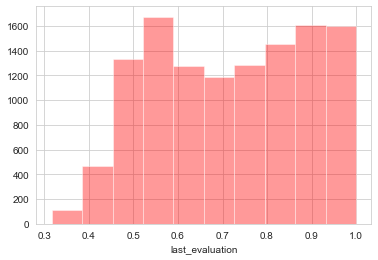

In [308]:
sns.set_style('whitegrid') 
sns.distplot(empdata['last_evaluation'], kde = False, color ='red', bins = 10)

**Observation:**
- As we can see, we have more scores after **0.5 which indicates more employee's last_evaluation is better**.
- We can also **replace** the missing values with **mean** of the column.

In [42]:
empdata['last_evaluation'] = empdata['last_evaluation'].fillna(empdata['last_evaluation'].mean())

**After Handling Null Data**

- Now that we have performed the operations, let's verify whether the null data has been eliminated or not.

In [43]:
null_frame = pd.DataFrame(index = empdata.columns.values)
null_frame['Null Frequency'] = empdata.isnull().sum().values
percent = empdata.isnull().sum().values/empdata.shape[0]
null_frame['Missing %age'] = np.round(percent,decimals=4)*100
null_frame.transpose()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- We have now **eliminated null data successfully**.

In [164]:
empdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         14121 non-null  object 
 2   filed_complaint    14121 non-null  float64
 3   last_evaluation    14121 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  14121 non-null  float64
 6   salary             14121 non-null  object 
 7   satisfaction       14121 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             14121 non-null  float64
 10  employee_id        14121 non-null  int64  
 11  age                14121 non-null  int64  
 12  gender             14121 non-null  object 
 13  marital_status     14121 non-null  object 
 14  dept_name          14121 non-null  object 
 15  dept_head          14121 non-null  object 
dtypes: float64(6), int64(3

<a id = Section53></a>
### **5.3 Identification & Handling of Inconsistent Data Types**

**Before changes: Respective Data Type per Feature**

In [44]:
type_frame = pd.DataFrame(data = empdata.dtypes, columns = ['Type'])
type_frame.transpose()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
Type,float64,object,float64,float64,int64,float64,object,float64,object,float64,int64,int64,object,object,object,object


**Observation:**

- **Inconsistent Feature:** 
  - Actual Type &rarr; Desired Type
- **filed_complaint:**
  - Float &rarr; Integer
- **recently_promoted:**
  - Float &rarr; Integer

**Performing Operations**

In [45]:
empdata['filed_complaint'] = empdata['filed_complaint'].astype(np.int64)
empdata['recently_promoted'] = empdata['recently_promoted'].astype(np.int64)

**After changes: Respective Data Type per Feature**

In [46]:
type_frame = pd.DataFrame(data = empdata.dtypes, columns = ['Type'])
type_frame.transpose()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
Type,float64,object,int64,float64,int64,int64,object,float64,object,float64,int64,int64,object,object,object,object


<a id = Section6></a>

---
# **6. Exploratory Data Analysis**
---

<a id = Section61></a>
### **6.1 Univariate Analysis**

**<h4>Question 1: What is the frequency and proportion of employees leaving the organization?</h4>**

- Before we proceed with  plotting the graph, we need to convert the status column to numeric.

In [48]:
empdata['status'].value_counts()

Employed    10763
Left         3358
Name: status, dtype: int64

In [49]:
empdata['status'] = empdata['status'].map({'Employed': 1, 'Left': 0})

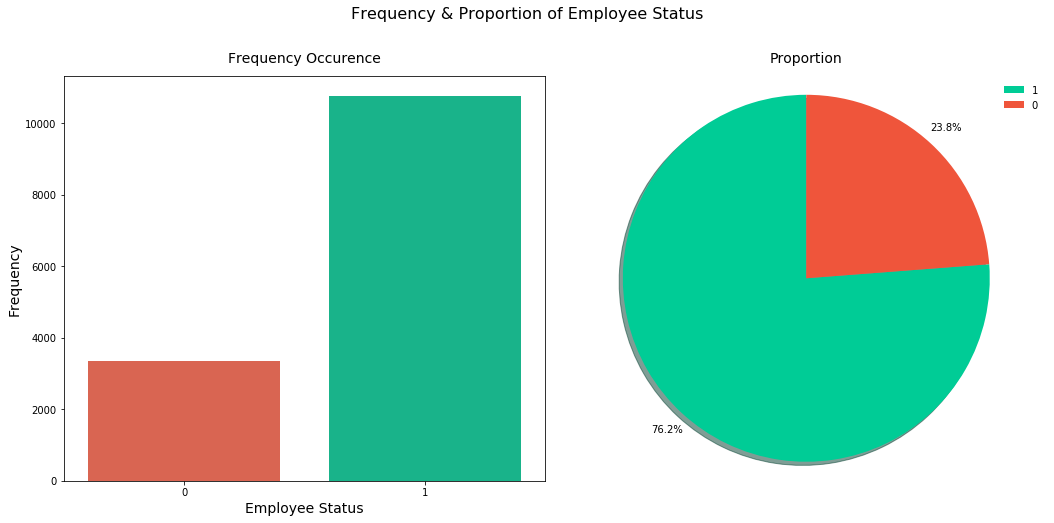

In [50]:
# Creating Figure Instance
figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96']
colors_list2 = ['#00CC96', '#EF553B']

# Bar Plot
plt.subplot(1, 2, 1)
ax = sns.barplot(empdata['status'].value_counts().index, empdata['status'].value_counts(), palette  = colors_list1)
plt.xlabel('Employee Status', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency Occurence', y=1.02, size = 14)

# Pie Plot

plt.subplot(1, 2, 2)
empdata['status'].value_counts().plot(kind = 'pie', figsize = [15, 7], autopct = '%1.1f%%', startangle = 90, 
                                     shadow = True, labels = None, pctdistance = 1.12, colors = colors_list2)
plt.title('Proportion', y = 1.02, size = 14)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = empdata['status'].value_counts().index, loc = 'upper right', frameon = False)
plt.suptitle(t = 'Frequency & Proportion of Employee Status', y = 1.05, size = 16)
plt.tight_layout(pad = 2.0)
plt.show()

**Observation:**

- Here, you can see out of **14121** employees **3358** had **left the organization** and **10763 are currently employed**. The no of **employee left is 24%** of the **total employment**.

**<h4>Question 2: What is the frequency and proportion of employees working on the projects?</h4>**

In [52]:
empdata['n_projects'].value_counts()

4    4044
3    3788
5    2568
2    2323
6    1095
7     242
1      61
Name: n_projects, dtype: int64

Text(0.5, 1.02, 'Frequency Of The Projects Handled')

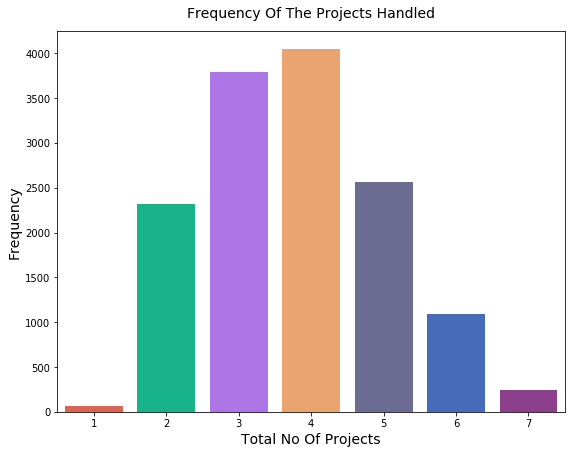

In [53]:
# Creating Figure Instance
figure = plt.figure(figsize = [20, 7])

colors_list1 = ['#EF553B', '#00CC96', '#AB63FA', '#FFA15A','#666699','#3366cc','#993399']

# Bar Plot
plt.subplot(1, 2, 1)
ax = sns.barplot(empdata['n_projects'].value_counts().index, empdata['n_projects'].value_counts(), palette  = colors_list1)
plt.xlabel('Total No Of Projects', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency Of The Projects Handled', y=1.02, size = 14)

**Observation:**

- Out of **14121** employees, we have **10400** employees working on **3-5 projects**.

**<h4>Question 3: What is the Total time spent by an employee in the organization?</h4>**

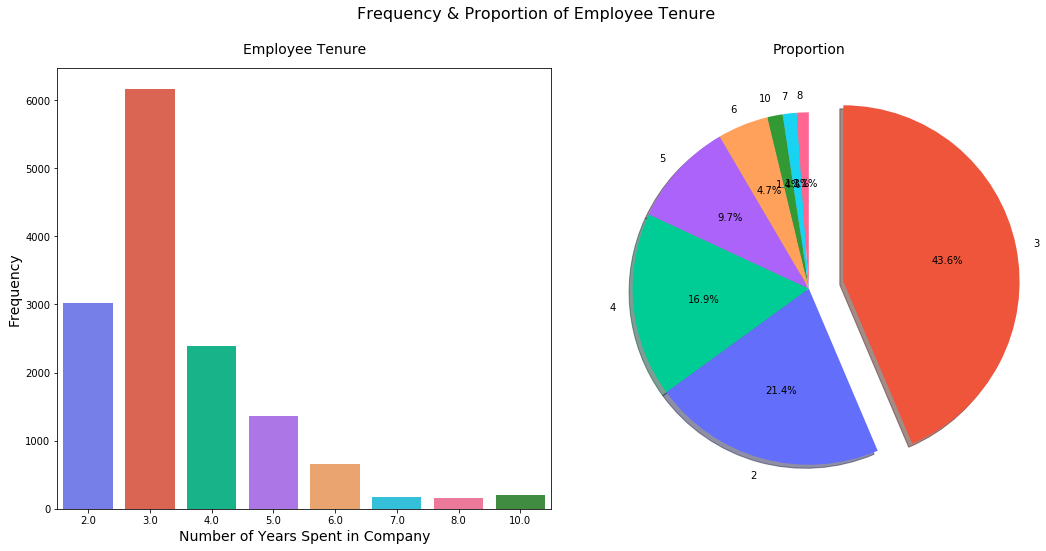

In [56]:
figure = plt.figure(figsize = [15, 7.25])

colors_list1 = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692','#339933']
colors_list2 = ['#EF553B', '#636EFA', '#00CC96', '#AB63FA', '#FFA15A', '#339933', '#19D3F3','#FF6692']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x = empdata['tenure'].value_counts().index, y = empdata['tenure'].value_counts(), palette  = colors_list1)
#plt.yticks(range(0, 65000, 5000), size = 14)
plt.xlabel('Number of Years Spent in Company', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Employee Tenure', y=1.02, size = 14)

# Plotting Plot 2 i.e. Pie Plot
explode_list = [0.2, 0 , 0, 0, 0, 0, 0, 0]
labels = ['3', '2', '4', '5', '6', '10','7','8']
plt.subplot(1, 2, 2)
plt.pie(empdata['tenure'].value_counts(), colors = colors_list2, labels=labels,
explode=explode_list,autopct='%1.1f%%',
startangle = 90,counterclock=False, shadow=True)
plt.title('Proportion', y = 1.02, size = 14)
plt.suptitle(t = 'Frequency & Proportion of Employee Tenure', y = 1.05, size = 16)
plt.tight_layout()
plt.show()

**Observation:**

- **~82% of employees** have experience between **2-4 years**.
- **After 3 years of experience** there are many employees who are **not staying with the organization**.

**<h4>Question 4: What is the proportion of employees getting promoted in last 3 years?</h4>**

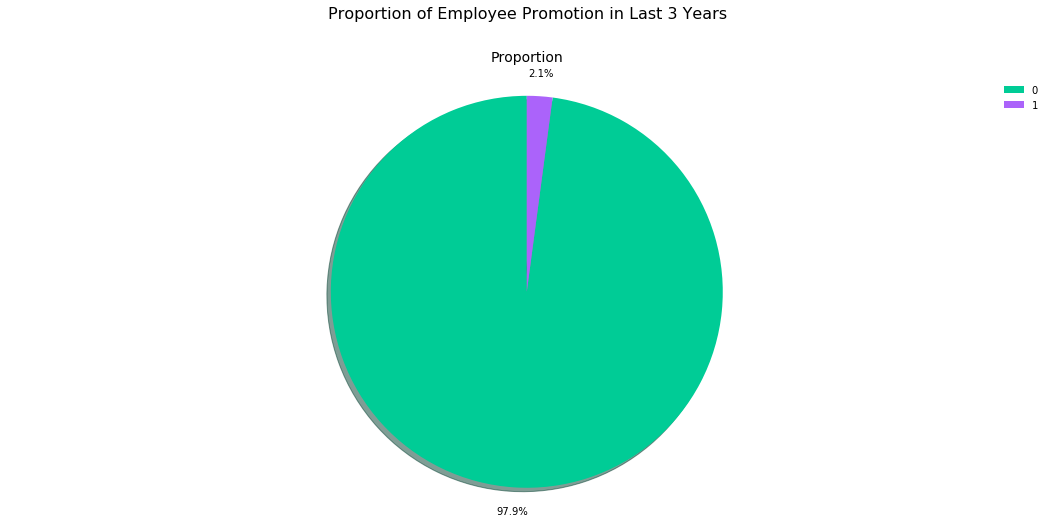

In [57]:
# Creating Figure Instance
figure = plt.figure(figsize = [7, 5])

colors_list2 = ['#00CC96', '#AB63FA']

empdata['recently_promoted'].value_counts().plot(kind = 'pie', figsize = [15, 7], autopct = '%1.1f%%', startangle = 90, 
                                     shadow = True, labels = None, pctdistance = 1.12, colors = colors_list2)
plt.title('Proportion', y = 1.02, size = 14)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = empdata['recently_promoted'].value_counts().index, loc = 'upper right', frameon = False)
plt.suptitle(t = 'Proportion of Employee Promotion in Last 3 Years', y = 1.05, size = 16)
plt.tight_layout(pad = 2.0)
plt.show()

**Observation:**

- Only **2% of employees** have got **promotion** in last **3 years**.

**<h4>Question 5: What is the distribution of the salary among the employees</h4>**

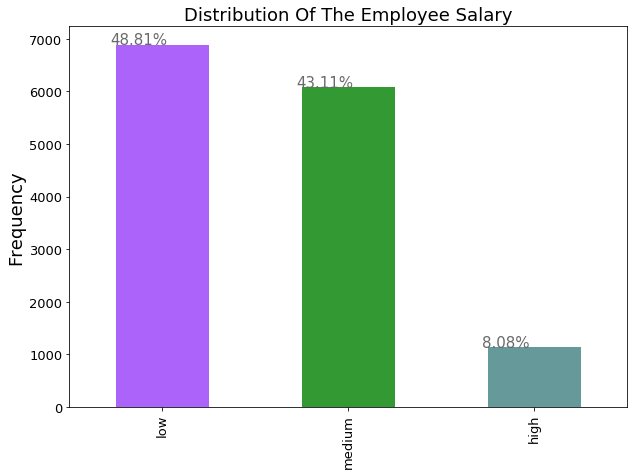

In [58]:
ax = empdata['salary'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color=['#AB63FA', '#339933', '#669999'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution Of The Employee Salary", fontsize=18)
ax.set_ylabel("Frequency", fontsize=18);
#ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

**Observation:**

- We have **49%** of the employees who are getting **low** salary and **43%** of employees are getting **medium** salary.
- **~8%** of employees are in **high salary** bracket.

**<h4>Question 6: What is the average total monthly hours worked by the employee</h4>**

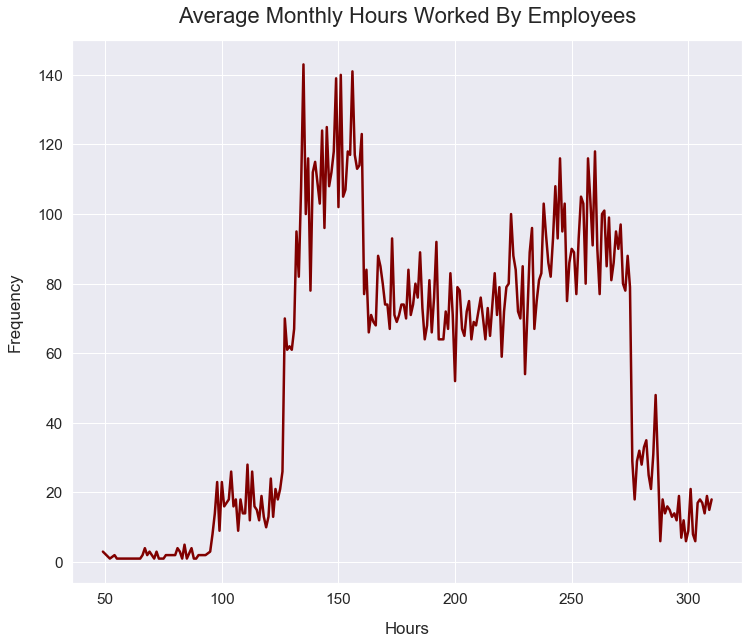

In [59]:
sns.set(font_scale=1.4)
empdata.avg_monthly_hrs.value_counts().sort_index().plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Hours", labelpad=15)
plt.ylabel("Frequency", labelpad=15)
plt.title("Average Monthly Hours Worked By Employees", y=1.02, fontsize=22);


**Observation:**

- We have approx more than **130 employees** who work on an average between **130 to 160 hours monthly**.
- There are approx more than **80 employees** who work on an average **250 hours monthly**.
- We have few employees who spend close to **300 hours on an average mothly**.

<a id = Section62></a>
### **6.2 Bivariate Analysis**

*We will use **status variable** to see where are the terminations occuring.*

**<h4>Question 1: Which department has more no of termination occuring?</h4>**

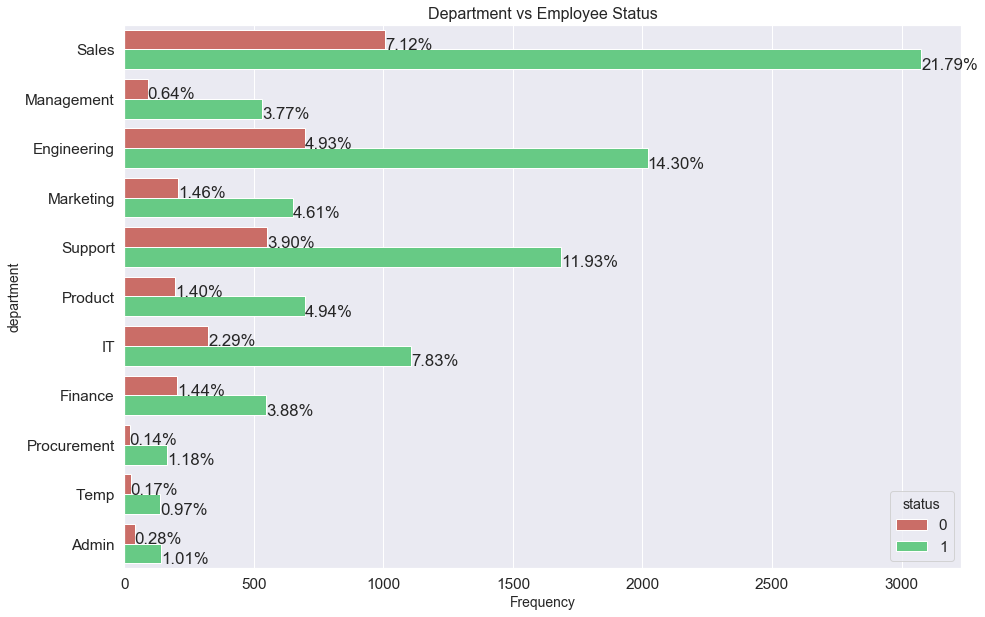

In [60]:
figure = plt.figure(figsize = [15, 10])
ax = sns.countplot(y="dept_name", hue="status", data=empdata, palette = ['#DB5E56', '#56DB7F'])

total = empdata.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel('Frequency', size = 14)
plt.ylabel('department', size = 14)
plt.title('Department vs Employee Status', y = 1, size = 16)
plt.show()

**Observation:**

- We have **23.5% overall attrition**  out of which **7% attrition** happening in **Sales department**.
- **Engineering department** has **5% attrition** followed by **Support department** with **4% attrition**.

**<h4>Question 2: What is the proportion of attrition based on the gender?</h4>**

In [61]:
#Gender distribution of employees
empdata['gender'].value_counts()

Male      9290
Female    4831
Name: gender, dtype: int64

In [62]:
print("Ratio of gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((empdata[(empdata['status'] == 0) & (
    empdata['gender'] == 'Male')].shape[0] / empdata[empdata['gender'] == 'Male'].shape[0])*100, (empdata[(empdata['status'] == 0) & (empdata['gender'] == 'Female')].shape[0] / empdata[empdata['gender'] == 'Female'].shape[0])*100))

Ratio of gender distribution of ex-employees in the dataset: Male = 20.0%; Female 31.0%.


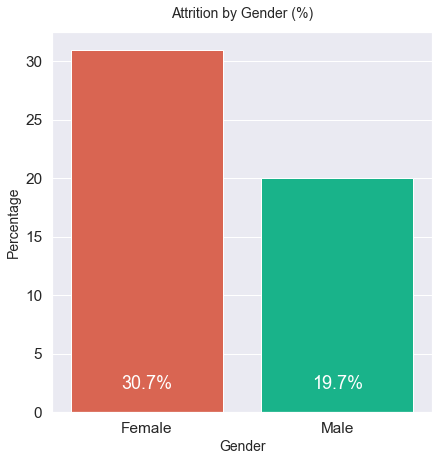

In [63]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Attrition"])
i=0
for field in list(empdata['gender'].unique()):
    ratio = empdata[(empdata['gender']==field)&(empdata['status']==0)].shape[0] / empdata[empdata['gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G=df_G.reset_index()

figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_G['Gender'],df_G['% of Attrition'], palette  = colors_list1)
plt.xlabel('Gender', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition by Gender (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="30.7%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="19.7%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.show()


**Observation:**

- **Gender distribution** shows that the dataset features a **higher relative proportion** of **female ex-employees** than **male ex-employees**, with **ratio of gender distribution** of **ex-employees** in the dataset at **30.7% for Females** and **19.7% for Males**.

**<h4>Question 3: What is the proportion of attrition based on the Marital Status?</h4>**

In [64]:
#Marital Status distribution of employees
empdata['marital_status'].value_counts()

Unmarried    7215
Married      6906
Name: marital_status, dtype: int64

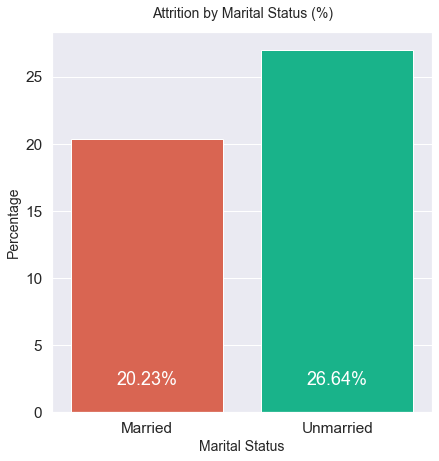

In [65]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Attrition"])
i=0
for field in list(empdata['marital_status'].unique()):
    ratio = empdata[(empdata['marital_status']==field)&(empdata['status']==0)].shape[0] / empdata[empdata['marital_status']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()

df_MF=df_MF.reset_index()

figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_MF['Marital Status'],df_MF['% of Attrition'], palette  = colors_list1)
plt.xlabel('Marital Status', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition by Marital Status (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="20.23%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="26.64%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.show()

**Observation:**

- We have **2 Marital Status** in our dataset: **Married (6906 employees), Unmarried (7215 employees)**.
- **Unmarried employees** have **largest proportion** in attrition at **26.64%**.

**<h4>Question 4: What is the proportion of attrition based on the Salary bracket?</h4>**

In [66]:
empdata['salary'].value_counts()

low       6893
medium    6087
high      1141
Name: salary, dtype: int64

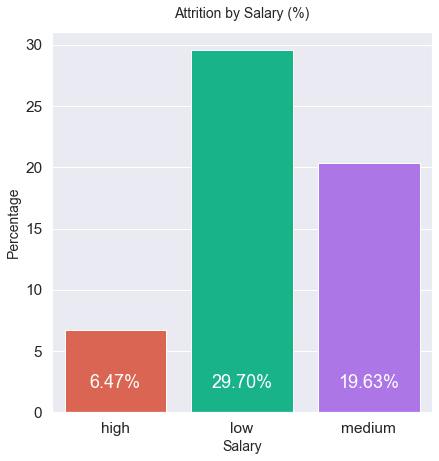

In [67]:
df_Salary = pd.DataFrame(columns=["Salary", "% of Attrition"])
i=0
for field in list(empdata['salary'].unique()):
    ratio = empdata[(empdata['salary']==field)&(empdata['status']==0)].shape[0] / empdata[empdata['salary']==field].shape[0]
    df_Salary.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Sal = df_Salary.groupby(by="Salary").sum()

df_Sal=df_Sal.reset_index()

figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96', '#AB63FA']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_Sal['Salary'],df_Sal['% of Attrition'], palette  = colors_list1)
plt.xlabel('Salary', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition by Salary (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="6.47%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="29.70%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=2, y=2, s="19.63%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.show()

**Observation:**

- We have **3 Salary bracket** in our dataset: **Low (6893 employees), Medium (6087 employees) & High (1141 employees)**.
- **Low salaried employees** have **largest proportion** in attrition at **29.70%**.

**<h4>Question 5: What is the proportion of attrition based on the Recent Promotion?</h4>**

In [68]:
empdata_copy = empdata.copy()
empdata_copy['recently_promoted'] = empdata_copy['recently_promoted'].map({0: 'Not Promoted', 1: 'Promoted'})
empdata_copy['recently_promoted'].value_counts()

Not Promoted    13824
Promoted          297
Name: recently_promoted, dtype: int64

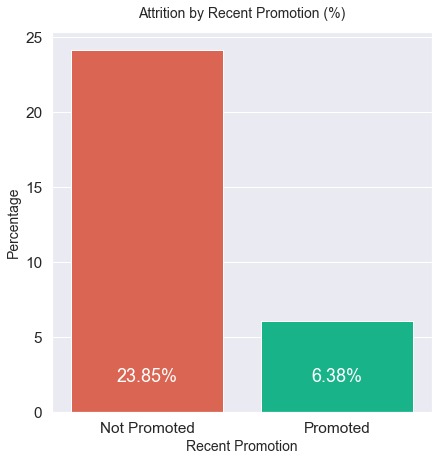

In [70]:
df_promotion = pd.DataFrame(columns=["Promotion", "% of Attrition"])
i=0
for field in list(empdata_copy['recently_promoted'].unique()):
    ratio = empdata_copy[(empdata_copy['recently_promoted']==field)&(empdata_copy['status']==0)].shape[0] / empdata_copy[empdata_copy['recently_promoted']==field].shape[0]
    df_promotion.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Pro = df_promotion.groupby(by="Promotion").sum()

df_Pro=df_Pro.reset_index()

figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_Pro['Promotion'],df_Pro['% of Attrition'], palette  = colors_list1)
plt.xlabel('Recent Promotion', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition by Recent Promotion (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="23.85%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="6.38%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.show()

**Observation:**

- It isn't a surprise that **employee's who do not get promotion from past 3 years** are having **largest proportion of attrition 23.85%**.

**<h4>Question 6: What is the proportion of attrition based on the no of projects handled by an employee?</h4>**

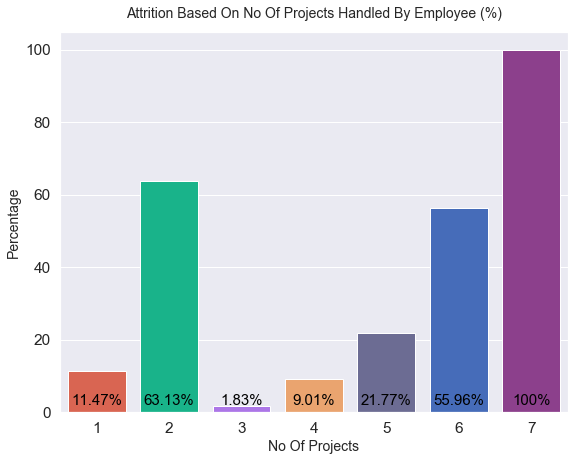

In [71]:
df_proj = pd.DataFrame(columns=["Projects", "% of Attrition"])
i=0
for field in list(empdata['n_projects'].unique()):
    ratio = empdata[(empdata['n_projects']==field)&(empdata['status']==0)].shape[0] / empdata[empdata['n_projects']==field].shape[0]
    df_proj.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_p = df_proj.groupby(by="Projects").sum()

df_p=df_p.reset_index()
df_p['Projects'] = df_p['Projects'].astype(np.int64)

figure = plt.figure(figsize = [20, 7])

colors_list1 = ['#EF553B', '#00CC96', '#AB63FA', '#FFA15A','#666699','#3366cc','#993399']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_p['Projects'],df_p['% of Attrition'], palette  = colors_list1)
plt.xlabel('No Of Projects', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition Based On No Of Projects Handled By Employee (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="11.47%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=1, y=2, s="63.13%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=2, y=2, s="1.83%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=3, y=2, s="9.01%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=4, y=2, s="21.77%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=5, y=2, s="55.96%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=6, y=2, s="100%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.show()

**Observation:**
- The **employees handling** more than **5 projects** are **leaving the organization**.
- The **employees handling 2 projects** are having **attrition rate with 63.13%**. This could be due to the fact that **employees** are **not happy the way first project was handled**.
- The **employees** who **handled 6 & 7 projects have left the organizations**, may be they were **overloaded with work**.

**<h4>Question 5: What is the proportion of attrition based on the employee tenure?</h4>**

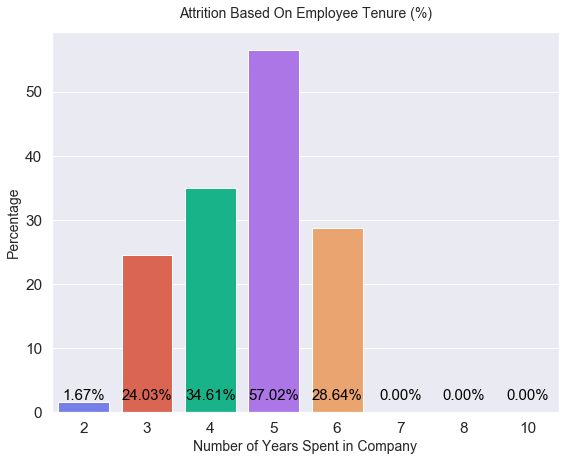

In [72]:
df_tenure = pd.DataFrame(columns=["Tenure", "% of Attrition"])
i=0
for field in list(empdata['tenure'].unique()):
    ratio = empdata[(empdata['tenure']==field)&(empdata['status']==0)].shape[0] / empdata[empdata['tenure']==field].shape[0]
    df_tenure.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_ten = df_tenure.groupby(by="Tenure").sum()

df_ten=df_ten.reset_index()
df_ten['Tenure'] = df_ten['Tenure'].astype(np.int64)

figure = plt.figure(figsize = [20, 7])

colors_list1 = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692','#339933']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_ten['Tenure'],df_ten['% of Attrition'], palette  = colors_list1)
plt.xlabel('Number of Years Spent in Company', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition Based On Employee Tenure (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="1.67%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=1, y=2, s="24.03%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=2, y=2, s="34.61%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=3, y=2, s="57.02%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=4, y=2, s="28.64%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=5, y=2, s="0.00%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=6, y=2, s="0.00%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.text(x=7, y=2, s="0.00%", 
                 color='black', fontsize=15, horizontalalignment='center')
plt.show()

**Observation:**
- The **employees leaving the organization** is **increasing after 3 years of tenure** and this could be due to **employees have not got their promotion in last 3 years**.
- We can see another **trend after 6 years of tenure employees are not leaving the organization** and this might be due to the **affection they have for the organization**.

**<h4>Question 6: What is the proportion of attrition based on the complaint filed by employee?</h4>**

In [73]:
empdata_copy['filed_complaint'] = empdata_copy['filed_complaint'].map({0: 'No', 1: 'Yes'})
empdata_copy['filed_complaint'].value_counts()

No     12080
Yes     2041
Name: filed_complaint, dtype: int64

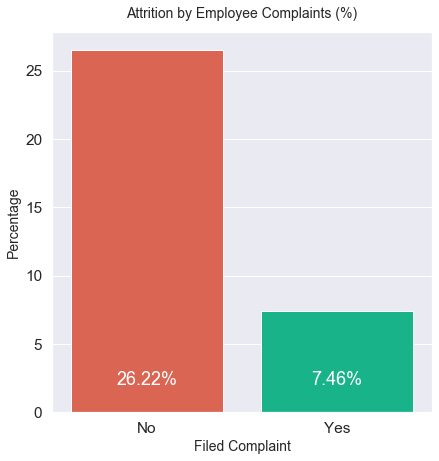

In [74]:
df_complaint = pd.DataFrame(columns=["Complaint", "% of Attrition"])
i=0
for field in list(empdata_copy['filed_complaint'].unique()):
    ratio = empdata_copy[(empdata_copy['filed_complaint']==field)&(empdata_copy['status']==0)].shape[0] / empdata_copy[empdata_copy['filed_complaint']==field].shape[0]
    df_complaint.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Comp= df_complaint.groupby(by="Complaint").sum()

df_Comp=df_Comp.reset_index()

figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_Comp['Complaint'],df_Comp['% of Attrition'], palette  = colors_list1)
plt.xlabel('Filed Complaint', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition by Employee Complaints (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="26.22%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="7.46%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.show()

**Observation:**
- **~26.22%** of the employees who **did not file complaint** have **left the organization**.
- Only **7.46%** of employees who **filed complaint** have **left the organization**.
- This indicates that the **company's feedback process is good** as we have very **less proportion of employee's leaving the organization** when compared to the **employee's who are leaving without complaining**.


**<h4>Question 7: What is the proportion of attrition based on the employee job satisfaction?</h4>**

- **Employee job satisfaction** column is a float data type which ranges from **0-1 (Higher the better)**. Hence we will create bins.
- Firstly, we have taken a copy of the empdata and put it in empdata_copy.
- We have created bins based on the below conditions:-

| Bins  |Labels   |
| ------------ | ------------ |
| 0-0.3  |  Low |
|  0.3-0.5 | Medium  |
| 0.5-0.7 |High   |
| 0.7-1 |Very High   |

In [75]:
empdata_copy['satisfaction'] = pd.cut(x=empdata_copy['satisfaction'],
                                     bins = [0,0.3,0.5,0.7,1],
                                     labels=['Low','Medium','High','Very High'])

In [76]:
empdata_copy['satisfaction'].value_counts()

Very High    6131
High         3713
Medium       2478
Low          1799
Name: satisfaction, dtype: int64

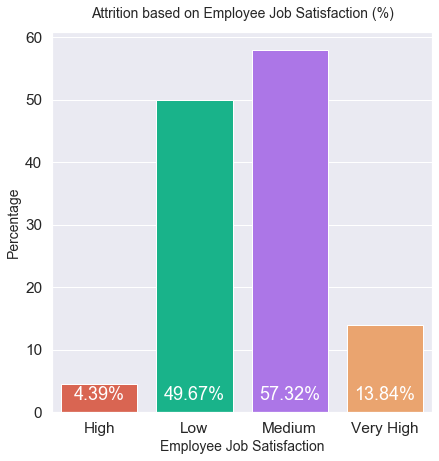

In [77]:
df_Satisfaction = pd.DataFrame(columns=["Satisfaction", "% of Attrition"])
i=0
for field in list(empdata_copy['satisfaction'].unique()):
    ratio = empdata_copy[(empdata_copy['satisfaction']==field)&(empdata['status']==0)].shape[0] / empdata_copy[empdata_copy['satisfaction']==field].shape[0]
    df_Satisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Sat = df_Satisfaction.groupby(by="Satisfaction").sum()

df_Sat=df_Sat.reset_index()

figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96', '#AB63FA','#FFA15A']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_Sat['Satisfaction'],df_Sat['% of Attrition'], palette  = colors_list1)
plt.xlabel('Employee Job Satisfaction', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition based on Employee Job Satisfaction (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="4.39%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="49.67%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=2, y=2, s="57.32%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=3, y=2, s="13.84%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.show()

**Observation:**
- **~57.32%** of the employees whose job satisfaction level is medium have **left the organization**.
- **~49.67%** of the employees whose job satisfaction level is low have **left the organization**.
- This also indicates that **company HR does not take much action** on **job satisfaction score provided by the employees** as we have almost **50% of the employee** who have provided scores **low and medium** are **leaving the organization**.


**<h4>Question 8: What is the proportion of attrition based on the employee evaluation?</h4>**

- **Employee last evaluation** column is a float data type which ranges from **0-1 (Higher the better)**. Hence we will create bins.
- Firstly, we have taken a copy of the empdata and put it in empdata_copy.
- We have created bins based on the below conditions:-

| Bins  |Labels   |
| ------------ | ------------ |
| 0-0.3  |  Low |
|  0.3-0.6 | Good  |
| 0.6-0.8 |Excellent   |
| 0.8-1 |Outstanding   |

In [80]:
empdata_copy['last_evaluation'] = pd.cut(x=empdata_copy['last_evaluation'],
                                     bins = [0,0.3,0.6,0.8,1],
                                     labels=['Low','Good','Excellent','Outstanding'])

In [81]:
empdata_copy['last_evaluation'].value_counts()

Excellent      5345
Outstanding    4785
Good           3991
Low               0
Name: last_evaluation, dtype: int64

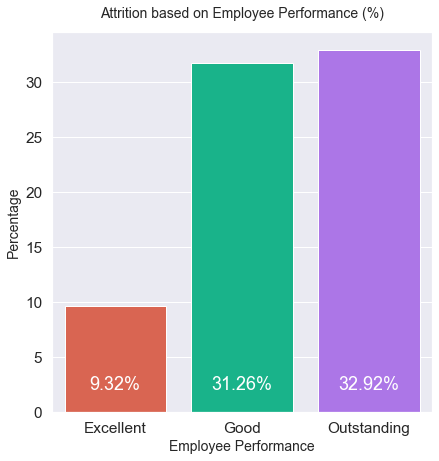

In [82]:
df_Performance = pd.DataFrame(columns=["Performance", "% of Attrition"])
i=0
for field in list(empdata_copy['last_evaluation'].unique()):
    ratio = empdata_copy[(empdata_copy['last_evaluation']==field)&(empdata['status']==0)].shape[0] / empdata_copy[empdata_copy['last_evaluation']==field].shape[0]
    df_Performance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Per = df_Performance.groupby(by="Performance").sum()

df_Per=df_Per.reset_index()

figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96', '#AB63FA']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_Per['Performance'],df_Per['% of Attrition'], palette  = colors_list1)
plt.xlabel('Employee Performance', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition based on Employee Performance (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="9.32%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="31.26%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=2, y=2, s="32.92%", 
               color='white', fontsize=18, horizontalalignment='center')
plt.show()

**Observation:**
- Employees who are performing **Excellent** are having a **attrition rate of 9.32%**.
- It is very **surprising** to see that **employees who are performing outstanding** are having more **attrition rate 32.92%**.
- This is something **company's HR** have to take into consideration to understand why are the **employees who are performing well are leaving the organization**.

**<h4>Question 9: What is the proportion of attrition based on the employee doing overtime?</h4>**

 - Let's look at the distribution of the **average monthly hours spent by the employees**.

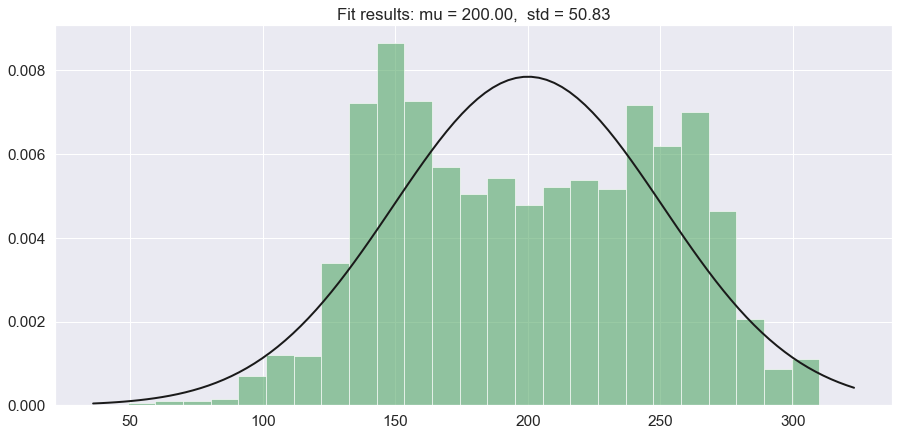

In [101]:
figure = plt.figure(figsize = [15, 7])
from scipy.stats import norm

data = empdata_copy['avg_monthly_hrs'].sort_values()
# Fit a normal distribution to the data:
mu, std = norm.fit(empdata_copy['avg_monthly_hrs'])

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

- **avg_monthly_hrs** column is a float data type which ranges from **49-310**. 
- We will create a additional feature called **Overtime**.
- We have created bins based on the below conditions:-

| Bins  |Labels   |
| ------------ | ------------ |
| 45-250  |  No |
|  250-310 | Yes  |

In [137]:
empdata_copy['OverTime'] = pd.cut(x=empdata_copy['avg_monthly_hrs'],
                                     bins = [45,250,310],
                                     labels=['No','Yes'])

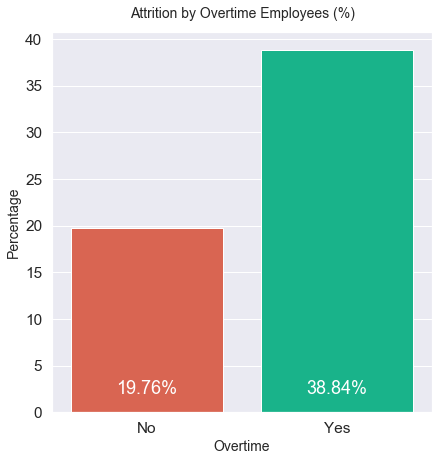

In [143]:
df_overtime = pd.DataFrame(columns=["Overtime", "% of Attrition"])
i=0
for field in list(empdata_copy['OverTime'].unique()):
    ratio = empdata_copy[(empdata_copy['OverTime']==field)&(empdata_copy['status']==0)].shape[0] / empdata_copy[empdata_copy['OverTime']==field].shape[0]
    df_overtime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Over= df_overtime.groupby(by="Overtime").sum()

df_Over=df_Over.reset_index()

figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(df_Over['Overtime'],df_Over['% of Attrition'], palette  = colors_list1)
plt.xlabel('Overtime', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Attrition by Overtime Employees (%)', y=1.02, size = 14)
plt.text(x=0, y=2, s="19.76%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="38.84%", 
                 color='white', fontsize=18, horizontalalignment='center')
plt.show()

**Observation:**
- The data clearly show that there is **significant larger portion** of employees with **Overtime that have left the organization**.
- We have **2973 employees** out of **14121 who are doing overtime**.
- Out of **2973 overtime employees, 1155 employees have left the organization**.

In [ ]:
empdata_copy =empdata_copy.drop([],axis=1)

In [ ]:

# Find correlations with the target and sort
df_HR_trans = df_HR.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

In [156]:
empdata.corr()['status'].sort_values()

employee_id         -0.223683
tenure              -0.142652
avg_monthly_hrs     -0.073682
last_evaluation     -0.038851
n_projects          -0.026754
age                  0.051657
recently_promoted    0.061006
filed_complaint      0.157692
satisfaction         0.387101
status               1.000000
Name: status, dtype: float64

In [157]:
from IPython.display import Image

Image(filename='test.png') 

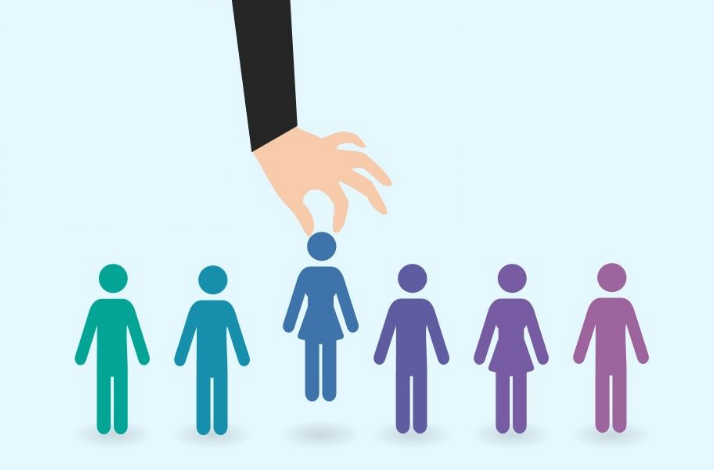